# <b> What is the best neighborhood in Pittsburgh?

Team Members:
   <br>Will Knipe
   <br>Ben Zarom
   <br>Camille Larson

# Part 1: Housing Conditions
By Will Knipe

In [6]:
import pandas as pd
import numpy as np

In [7]:

housing_cond = pd.read_csv("https://data.wprdc.org/dataset/12edd529-5119-49c7-92b5-15314b3ae25e/resource/a1f3ffd9-34bf-4255-97a8-af8084894159/download/poorhousingconditions.csv", )
tract_data = pd.read_csv("http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/e1894e5ab8ea4889923efd810b13f760_0.csv")

tract_data.head()

,objectid,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,aland10,...,objectid_1,tractce10_1,cnt_tractce10,sum_lowmod2018,sum_lowmoduniv,lowmodperct,lowmodpercanno,cdbg2018,Shape__Area,Shape__Length
0,1,42,3,40500,1,420030405001,Block Group 1,G5030,S,268195,...,7,40500,2,2775,2985,92.964824,92.96,Yes,5.079492e+06,10442.036450
1,2,42,3,40400,1,420030404001,Block Group 1,G5030,S,75472,...,6,40400,2,1365,2020,67.574257,67.57,Yes,2.105489e+06,6609.688123
2,3,42,3,40200,2,420030402002,Block Group 2,G5030,S,282679,...,5,40200,2,1070,1290,82.945736,82.94,Yes,5.998649e+06,18280.484081
3,4,42,3,30500,2,420030305002,Block Group 2,G5030,S,284548,...,4,30500,2,1635,2130,76.760563,76.76,Yes,7.203631e+06,15694.771444
4,5,42,3,980000,1,420039800001,Block Group 1,G5030,S,637235,...,125,980000,1,65,220,29.545455,29.54,No,7.764866e+06,13581.875089


In [8]:
housing_cond.head()

,TRACT,PPoorCon
0,431100,0.022593
1,432300,0.015898
2,563800,0.016079
3,563300,0.018003
4,451104,0.009339


In [9]:
#remove duplicated values
housing_cond = housing_cond[~housing_cond.index.duplicated()]
    
#remove the last two digits of the TRACT number in housing_cond dataset
for i, val in enumerate(housing_cond['TRACT']):
    housing_cond.loc[i, 'TRACT'] = str(val)[:-2]
housing_cond.head()

,TRACT,PPoorCon
0,4311,0.022593
1,4323,0.015898
2,5638,0.016079
3,5633,0.018003
4,4511,0.009339


In [13]:
#remove irrelevant columns from tract_data
tract_cols = list(tract_data.columns)
tract_cols.remove("hood")
tract_cols.remove("tracttext")

tract_data = tract_data.drop(tract_cols, axis=1)

In [14]:
# Join the two datasets over the tract number
tract_data = tract_data[~tract_data.index.duplicated()]
tract_data['tracttext'] = tract_data['tracttext'].astype(str)
#housing_cond['TRACT']=housing_cond['TRACT'].astype(int)
df3 = pd.merge(housing_cond, tract_data, left_on="TRACT", right_on="tracttext")
df3 = df3.sort_values(by=['PPoorCon'], ascending=False)
print(df3.to_string())

    TRACT  PPoorCon                       hood tracttext
59   2412  0.126110              Spring Garden      2412
49   2614  0.082067                Perry South      2614
128  1207  0.081522              Homewood West      1207
74   1016  0.068966                   Garfield      1016
101  1301  0.058333             Homewood North      1301
98   1303  0.058168             Homewood South      1303
127  1204  0.057522                    Larimer      1204
99   1304  0.054908             Homewood South      1304
19   2715  0.054889         Marshall-Shadeland      2715
61   2507  0.054264       California-Kirkbride      2507
89   5623  0.053819                  Hazelwood      5623
112   605  0.049327                Polish Hill       605
11   4810  0.044554       Mount Oliver Borough      4810
75   1017  0.040712                   Garfield      1017
73    402  0.037139               West Oakland       402
54   1803  0.036925                  Allentown      1803
3     501  0.036123            

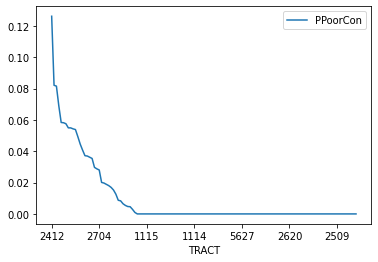

In [11]:
import matplotlib.pyplot as plt
df3.plot(x='TRACT', y='PPoorCon')

In [12]:
df3['PPoorCon'].describe()

count    129.000000
mean       0.009929
std        0.021574
min        0.000000
25%        0.000000
50%        0.000000
75%        0.004720
max        0.126110
Name: PPoorCon, dtype: float64

# Conclusion

To prepare the data, I converted the original TRACT numbers to neighborhood names using a dataset provided by the 2010 US Census. After processing the data, I noticed that the majority of Pittsburgh neighborhoods in the dataset were given a PPoorCon (Percentage of Poor Housing Conditions) value of 0. This means that the independent surveyors found no houses in the sample that were in poor condition. While the data is not particularly useful for comparing high-end neigborhoods (those with a PPoorCon of 0), it can give a good metric to compare neighborhoods with worse housing quality (PPoorCon > 0). After analyzing the data, I found 36 Pittsburgh neighborhoods had a PPoorCon > 0, the mean PPoorCon was .0099 with a std of .0215. The dataset indicates that the worst 5 neighborhoods in terms of housing quality are Spring Garden, Perry South, Homewood West, Garfield, and Homewood North, with Spring Garden being the worst with a PPoorCon of .1261.

# <b>Part 2: Median Household Income
  <b>By Ben Zarom

In [2]:
##Importing the data set. 

import pandas as pd

income = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/f7b19c6c-aa66-419b-b0e1-9998d7ddfcbc/download/education-income.csv")

In [3]:

##Sorting the Values by the value of Median Income.

median_income=income.sort_values("2009 Med. Income ('13 Dollars)",ascending=False)  

##Setting Index to Neighborhood to better represent our metric.
median_income=median_income.set_index('Neighborhood')
median_income.head(90)

,Sector #,Population (2010),"Total Pop, 25 and older (2010)",Edu. Attainment: Less than High School (2010),Edu. Attainment: High School Graduate (2010),Edu. Attainment: Assoc./Prof. Degree (2010),Edu. Attainment: Bachelor's Degree (2010),Edu. Attainment: Postgraduate Degree (2010),1999 Median Income ('99 Dollars),2009 Median Income ('09 Dollars),1999 Median Income ('11 Dollars),2009 Med. Income ('13 Dollars),Est. Pop. for which Poverty Calc. (2010),Est. Pop. Under Poverty (2010),Est. Percent Under Poverty (2010)
Neighborhood,,,,,,,,,,,,,,,
Point Breeze,10,"5,315","4,322",5.0%,23.2%,13.4%,25.9%,32.5%,"$71,548","$87,802","$95,044","$95,704","5,801",264,4.6%
Squirrel Hill North,10,"11,363","6,207",1.8%,14.1%,17.4%,26.7%,40.1%,"$64,740","$83,861","$86,001","$91,409","9,009",797,8.8%
New Homestead,8,990,923,10.1%,63.1%,10.9%,13.0%,2.9%,"$42,019","$83,167","$55,818","$90,652","1,360",115,8.5%
North Shore,16,303,196,5.6%,36.2%,24.0%,5.6%,28.6%,"$70,125","$82,650","$93,154","$90,089",229,0,0.0%
Regent Square,10,928,909,4.0%,24.1%,6.9%,21.0%,44.0%,"$54,450","$77,647","$72,331","$84,635","1,098",12,1.1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bluff,15,"6,600","2,834",14.1%,73.9%,4.4%,2.6%,5.0%,"$11,515","$12,795","$15,297","$13,947","1,365","1,095",80.2%
Terrace Village,15,"3,228","1,368",26.1%,53.1%,8.8%,4.0%,7.9%,"$7,230","$10,857","$9,604","$11,834","2,293","1,060",46.2%
Bedford Dwellings,15,"1,202",733,8.3%,49.9%,12.8%,14.2%,14.7%,"$8,955","$9,992","$11,896","$10,891","1,203",589,49.0%


In [4]:

##Taking the First 5 Neighborhoods.

median_income.head(5)

,Sector #,Population (2010),"Total Pop, 25 and older (2010)",Edu. Attainment: Less than High School (2010),Edu. Attainment: High School Graduate (2010),Edu. Attainment: Assoc./Prof. Degree (2010),Edu. Attainment: Bachelor's Degree (2010),Edu. Attainment: Postgraduate Degree (2010),1999 Median Income ('99 Dollars),2009 Median Income ('09 Dollars),1999 Median Income ('11 Dollars),2009 Med. Income ('13 Dollars),Est. Pop. for which Poverty Calc. (2010),Est. Pop. Under Poverty (2010),Est. Percent Under Poverty (2010)
Neighborhood,,,,,,,,,,,,,,,
Point Breeze,10,"5,315","4,322",5.0%,23.2%,13.4%,25.9%,32.5%,"$71,548","$87,802","$95,044","$95,704","5,801",264,4.6%
Squirrel Hill North,10,"11,363","6,207",1.8%,14.1%,17.4%,26.7%,40.1%,"$64,740","$83,861","$86,001","$91,409","9,009",797,8.8%
New Homestead,8,990,923,10.1%,63.1%,10.9%,13.0%,2.9%,"$42,019","$83,167","$55,818","$90,652","1,360",115,8.5%
North Shore,16,303,196,5.6%,36.2%,24.0%,5.6%,28.6%,"$70,125","$82,650","$93,154","$90,089",229,0,0.0%
Regent Square,10,928,909,4.0%,24.1%,6.9%,21.0%,44.0%,"$54,450","$77,647","$72,331","$84,635","1,098",12,1.1%


# Conclusion


The Median Household income of a Neighborhood says alot about the Neighborhood. It reveals what the yearly income is for the 50th percentile of that Neighborhood. This is a better measuring statistic than simply the average income of a Neighborhood because the median eliminates the potential of outliars skewing the data.

Furthermore, the wealth of the Neighborhood is a good indicator of the resources in sed Neighborhood. A high median income is correlated with good public education nearby, high quality hospitals and medical care, higher funded youth centers, and higher funded public parks. While the neighborhood with the highest median househould income does not neccesarily mean it will have the best resources, it is a good all encompassing metric for the quality of resources in the Neighborhood.

# <b>Part 3: Conditions of Trees

<b>by Camille Larson

<b>When starting this project, I wanted to focus on a more enviornmental aspect of the trees. I chose to talk about trees because trees are very important to air quality, but they are also important on a visual level too. I chose to create a metric more about the conditions of the overall trees in a neighborhood rather than total trees. Personally, I believe a few, excellent trees is better than hundreds of dead trees. For this, I used a dataset caled "City of Pittsburgh trees". The trees in this dataset are "cared for and managed by the City of Pittsburgh Department of Public Works Forestry Division."


In [16]:
import pandas as pd
import collections
%matplotlib inline
import matplotlib.pyplot as plt

<b>Below is a sample of the data. As you can see, there are many different aspects collected about each tree, from common name to the growth space length. I wanted to focus specificially on condition of the tree and the neighborhood it is located in.

In [18]:
#load trees directly from WRPD- City of Pittsburgh Trees
trees = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da", dtype = 'object')
trees.head()

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428,MONTICELLO ST,Stump,Stump,0,0,10,2,Well or Pit,...,Homewood North,9,13,42003130200,2,13,5,3-17,40.45816863,-79.88972391
1,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0,0,99,99,Open or Unrestricted,...,Oakwood,2,28,42003562800,5,28,6,1-19,40.42926879,-80.06786821
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22,6,6,3,Well or Pit,...,South Side Flats,3,16,42003160900,3,16,3,4-24,40.42679667,-79.96503491
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25,10,3,3,Well or Pit,...,East Allegheny,1,23,42003563200,1,23,1,1-6,40.45550338,-79.99927602
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52,13,99,99,Open or Unrestricted,...,Highland Park,7,11,42003110200,2,11,5,3-9,40.47666673,-79.92410638


<b>Because I want to focus on condition and neighborhood location, I just took the condition column and neighborhood column from the data.

In [19]:
#Just need condition and neighborhood
new = trees.iloc[0:, [14, 48]]
new

,condition,neighborhood
0,NaN,Homewood North
1,NaN,Oakwood
2,Fair,South Side Flats
3,Fair,East Allegheny
4,Good,Highland Park
...,...,...
45704,Poor,Point Breeze North
45705,Good,Squirrel Hill North
45706,Good,Squirrel Hill North
45707,Good,Squirrel Hill North


<b>In order to best get the overall tree conditions in a neighborhood, I replaced the condition type with a number from 0-6. 0 is excellent and 6 is dead. 

In [20]:
newTrees = trees.replace(to_replace=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor', 'Critical', 'Dead'], value=[0, 1, 2, 3, 4, 5, 6])
newTrees.sort_values(by="condition", inplace=True)
new_data = newTrees.iloc[0:, [14, 48]].dropna()
new_data

,condition,neighborhood
19285,0.0,Highland Park
19296,0.0,Highland Park
16430,0.0,Swisshelm Park
16442,0.0,Swisshelm Park
16453,0.0,Stanton Heights
...,...,...
30601,6.0,Stanton Heights
30600,6.0,Crafton Heights
30599,6.0,Perry North
30595,6.0,Beechview


<b>By pivoting the data around the neighborhood, I can see that there are 90 neighborhoods, and I can see a small sample of how many trees some neighborhoods contain

In [21]:
pivot_data = new_data.pivot(columns="condition", values = "neighborhood")
pivot_data.count()

condition
0.0       79
1.0      550
2.0    16403
3.0    16232
4.0     4615
5.0      988
6.0     1098
dtype: int64

In [22]:
neighborhoods = new_data.groupby("neighborhood")
neighborhoods.count()

,condition
neighborhood,
Allegheny Center,861
Allegheny West,368
Allentown,59
Arlington,81
Arlington Heights,4
...,...
Upper Lawrenceville,322
West End,109
West Oakland,71


<b>In the data, I saw that some trees were not given a condition like excellent, dead, etc; they were considered NaN. This would not help the data, so I had to drop these trees. I also created a list of the neighborhoods to use later

In [23]:
count = 0
mean = 0
neighborhoodList = []
neighborhoodList = new_data["neighborhood"].dropna().unique()
neighborhoodDict = dict();

<b>I then created a list that would contain the neighborhood in each even index, and the next index would contain its overall mean condition. 

In [27]:
fullList = []
i = 0

for n in neighborhoodList:
    i = 0
    mean = 0
    total = 0
    fullList.append(n)
    indexArray = []
    while i < len(new_data):
        if new_data['neighborhood'].iloc[i] == n:
            indexArray.append(new_data['condition'].iloc[i])
            total += 1
        i = i + 1
    for a in indexArray:
        mean = mean + a
    mean = mean / total
    fullList.append(mean)

<b>I then created a dictionary to hold the neighborhoods and their corresponding mean. 

In [28]:
x = 0
y = 1

while (x<(len(fullList)-1)):
    neighborhoodDict[fullList[x]] = fullList[y]
    x+=2
    y+=2
print(neighborhoodDict)

{'Highland Park': 2.809784592917123, 'Swisshelm Park': 2.6425531914893616, 'Stanton Heights': 2.8945686900958467, 'Brookline': 2.635097493036212, 'Brighton Heights': 2.9203655352480418, 'South Side Flats': 2.509575923392613, 'Banksville': 2.8714285714285714, 'Morningside': 2.8306451612903225, 'Squirrel Hill North': 2.725186766275347, 'Bloomfield': 2.6968670618120236, 'Greenfield': 2.808130081300813, 'Squirrel Hill South': 2.792962356792144, 'Hazelwood': 3.2229038854805725, 'Manchester': 2.9550949913644216, 'Shadyside': 2.9847677075399845, 'Lincoln-Lemington-Belmar': 3.623157894736842, 'Carrick': 2.9074074074074074, 'Central Lawrenceville': 2.6378205128205128, 'Knoxville': 2.8058252427184467, 'Garfield': 2.5790513833992095, 'Point Breeze': 2.8285960378983637, 'Elliott': 2.488372093023256, 'Friendship': 2.360655737704918, 'Central Northside': 2.6726973684210527, 'Lincoln Place': 3.125, 'New Homestead': 2.5977653631284916, 'Duquesne Heights': 2.1728395061728394, 'Spring Hill-City View': 3

<b>Reading through this dictionary would give me the data needed to determine the best neighborhood in Pittsburgh; however, I plotted the neighborhoods on the graph to get a better visual of the neighborhoods and their conditions. The best neighborhoods have the smallest bars. 

<function matplotlib.pyplot.show(*args, **kw)>

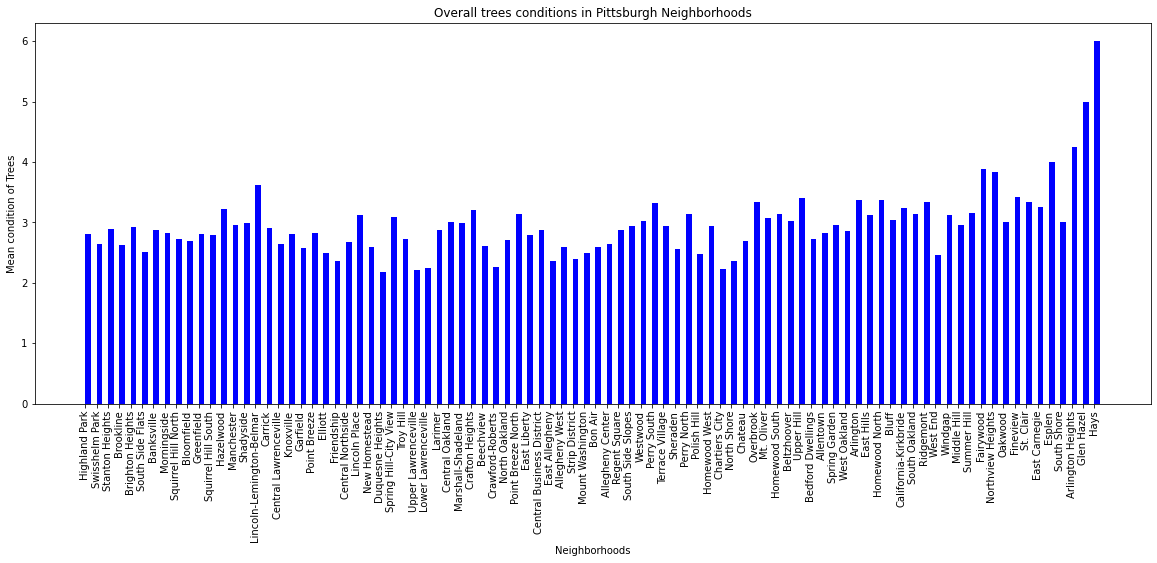

In [26]:
plt.figure(figsize=(20,7))
plt.bar(neighborhoodDict.keys(), neighborhoodDict.values(), align='edge', width=0.5, color = 'blue')
plt.xticks(rotation=90)
plt.xlabel("Neighborhoods")
plt.ylabel("Mean condition of Trees")
plt.title("Overall trees conditions in Pittsburgh Neighborhoods")
plt.show

<b>From the bar graph/dictionary we can see that the top 5 neighborhoods are:
    <br>1. Duquesne Heights - 2.172
    <br>2. Upper Lawrenceville - 2.22
    <br>3. Chartiers City - 2.222
    <br>4. Lower Lawrenceville - 2.239
    <br>5. Crawford-Roberts - 2.267

<b>From this data, we can conclude that the best neighborhood is Duquesne Heights and the worst neighborhood is Hays. Since I have not personally been to these neighborhoods, I can not fully say that this is the best and worst neighborhood. I also understand that this analysis only measures one metric, so the true best neighborhood may not even be in the top 5 here. In order to find the true best neighborhood, one must measure a lot more metrics. 